In [111]:
import numpy as np
from numpy import sin,cos,pi,exp,sqrt
import matplotlib.pyplot as plt
import scipy.fft

%matplotlib inline

# 1.(a)

In [112]:
t=np.linspace(0,1,200)

# f_1,f_2,f_3,f_4 are in Hz

f_1 = 5
f_2 = 15
f_3 = 25
f_4 = 50
x_t=9*sin(2*pi*f_1*t)+7*sin(2*pi*f_2*t)+5*sin(2*pi*f_3*t)+3*sin(2*pi*f_4*t)


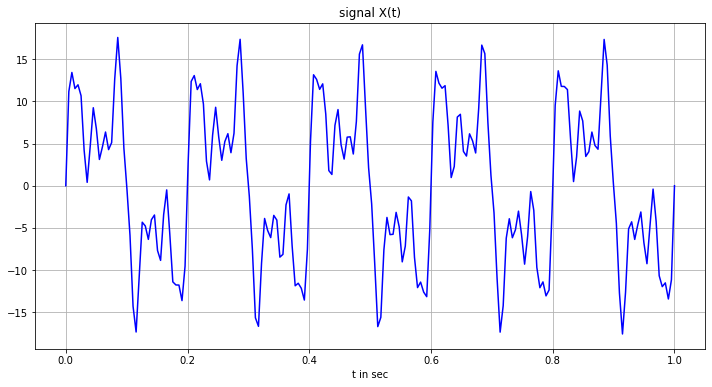

In [113]:
plt.figure(figsize=(12,6))
plt.plot(t,x_t,'b')
plt.title('signal X(t)')
plt.xlabel('t in sec')
plt.grid()

# 1.(b)

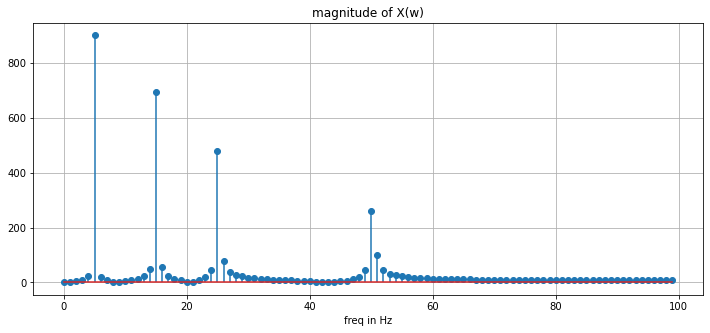

In [114]:
# defining function of DFT 

def DFT(x):
    N = len(x)
    ans = []
    for k in range(N):
        dft = 0
        for n in range(N):
            dft += x[n]*np.exp(-2j*np.pi*k*n/N)
        ans.append(dft)
    return ans

X_k = DFT(x_t)[0:100]
k = np.arange(len(x_t)/2)

plt.figure(figsize=(12,5))
plt.stem(k,np.absolute(X_k))
plt.title('magnitude of X(w)')
plt.xlabel('freq in Hz')
plt.grid()

# 1.(c)

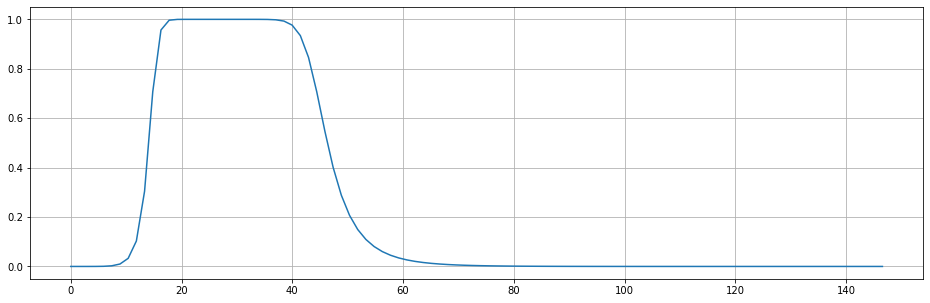

In [115]:
from scipy import signal

b, a = signal.butter(6,[10,30] , 'bp', fs=200)
w, h = signal.freqz(b, a, worN=100)

plt.figure(figsize=(16,5))
plt.plot(w*30/2*np.pi,np.abs(h))
plt.grid()

# 1.(d)

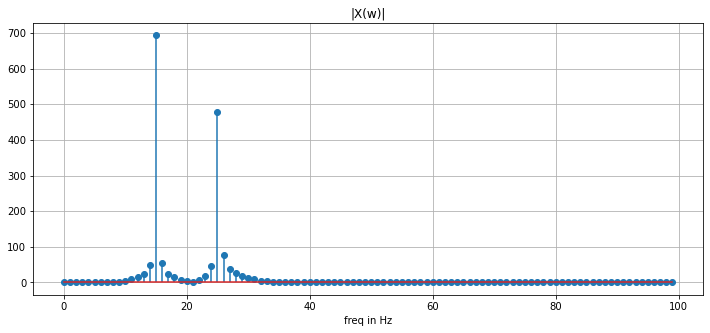

In [116]:
X_multiplied = X_k*h

plt.figure(figsize=(12,5))
plt.stem(k,np.absolute(X_multiplied))
plt.title('|X(w)|')
plt.xlabel('freq in Hz')
plt.grid()

# 1.(e)

/Users/himanshubairwa/opt/anaconda3/lib/python3.8/site-packages/matplotlib/collections.py:1402: ComplexWarning: Casting complex values to real discards the imaginary part
  seg = np.asarray(seg, float)
/Users/himanshubairwa/opt/anaconda3/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


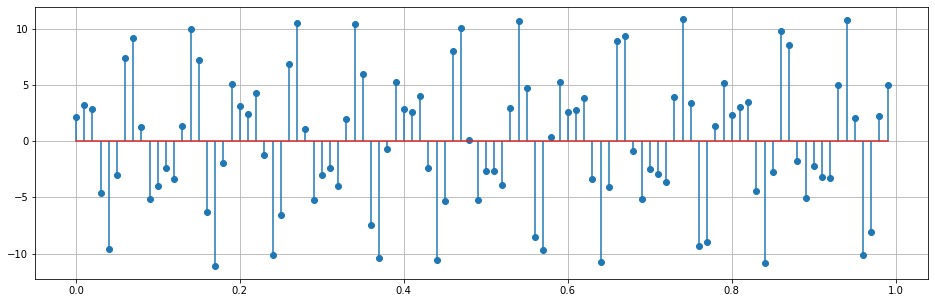

In [117]:
def inv_DFT(X):
    N = len(X)
    x = []
    for n in range(N):
        xn = 0
        for k in range(N):
            xn += X[k]*np.exp(2j*np.pi*k*n/N)/N
        x.append(xn)
    return x
        
xn = inv_DFT(X_multiplied)

t = np.arange(0,1,1/100)

plt.figure(figsize=(16,5))
plt.stem(t,xn)
plt.grid()

# 3.(a)

Zeros= [ 2.5+0.j         -0.8+1.16619038j -0.8-1.16619038j]
Poles= [-0.4+0.58309519j -0.4-0.58309519j  0.4+0.j        ]


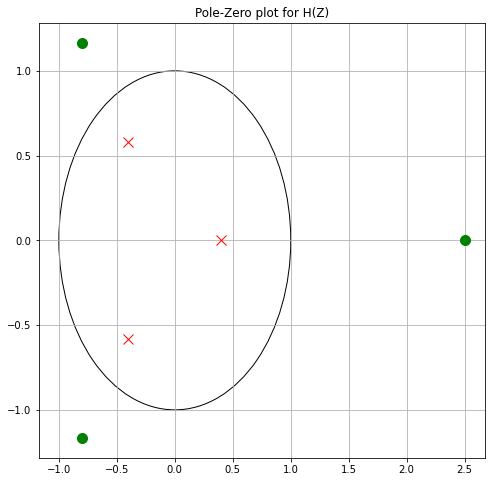

In [119]:
numerator = [-0.2,0.18,0.4,1]
denominator=[1,0.4,0.18,-0.2]
Z=np.roots(numerator)                 #numerator of H(z)
print("Zeros=",Z)
P=np.roots(denominator)                #denomenator of H(z)
print("Poles=",P)

plt.figure(figsize=(8,8))
# plt.xlim([-1,1])
t1 = plt.plot(Z.real, Z.imag, 'go', ms=10)

# Plot the poles and set marker properties
t2 = plt.plot(P.real, P.imag, 'rx', ms=10)

circle1 = plt.Circle((0, 0), 1,fill=False)
plt.gca().add_patch(circle1)
plt.title('Pole-Zero plot for H(Z)')
plt.grid()
plt.show()

### Conclusion

**this poles and zeros location are showig the properties of ALL PASS FILTER and thier pole and zeros showing inverse complex conjugate relationship.**

# 3.(b)

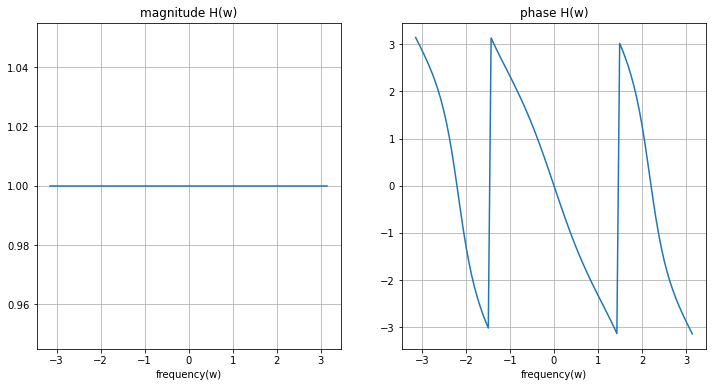

In [120]:
w=np.linspace(-np.pi,np.pi,100)
z=np.exp(1j*w)
num=(-0.2*(z**3))+(0.18*(z**2))+(0.4*z)+1
den=(z**3)+(0.4*(z**2))+(0.18*z)-0.2
H_z=num/den
Magnitude=np.abs(H_z)
angle=np.angle(H_z)
fig, ax=plt.subplots(1,2,figsize=(12,6))        
ax[0].plot(w,Magnitude)
ax[0].set_title('magnitude H(w)')
ax[0].set_xlabel("frequency(w)")
ax[0].grid()
ax[1].plot(w,angle)
ax[1].set_title('phase H(w)')
ax[1].set_xlabel("frequency(w)")
ax[1].grid()

# 4.(b and c)

[1.00000657+0.00000000e+00j 0.99999671+5.69145455e-06j
 0.99999671-5.69145455e-06j]
[-0.00232899+0.77640918j -0.00232899-0.77640918j -0.33853523+0.j        ]


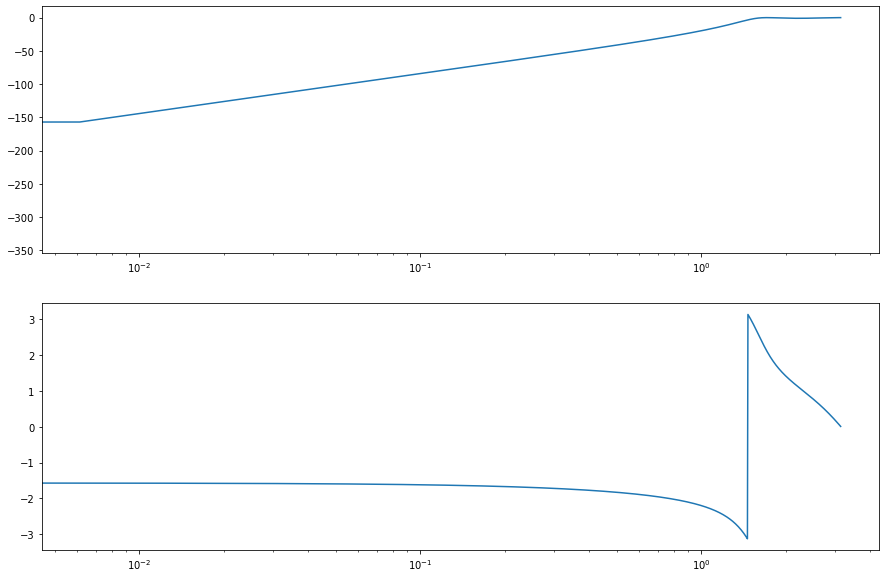

In [136]:
n,d = signal.cheby1(N=3,rp = 1,Wn = [2000], btype = 'highpass', output = 'ba', fs = 8000)
zeros = np.roots(n)
poles = np.roots(d)
print(zeros)
print(poles)
w, z = signal.freqz(n,d)

fig,ax = plt.subplots(2,1,figsize = (15,10))
ax[0].semilogx(w, 20 * np.log10(abs(z)))
ax[1].semilogx(w, np.angle(z))

# 5

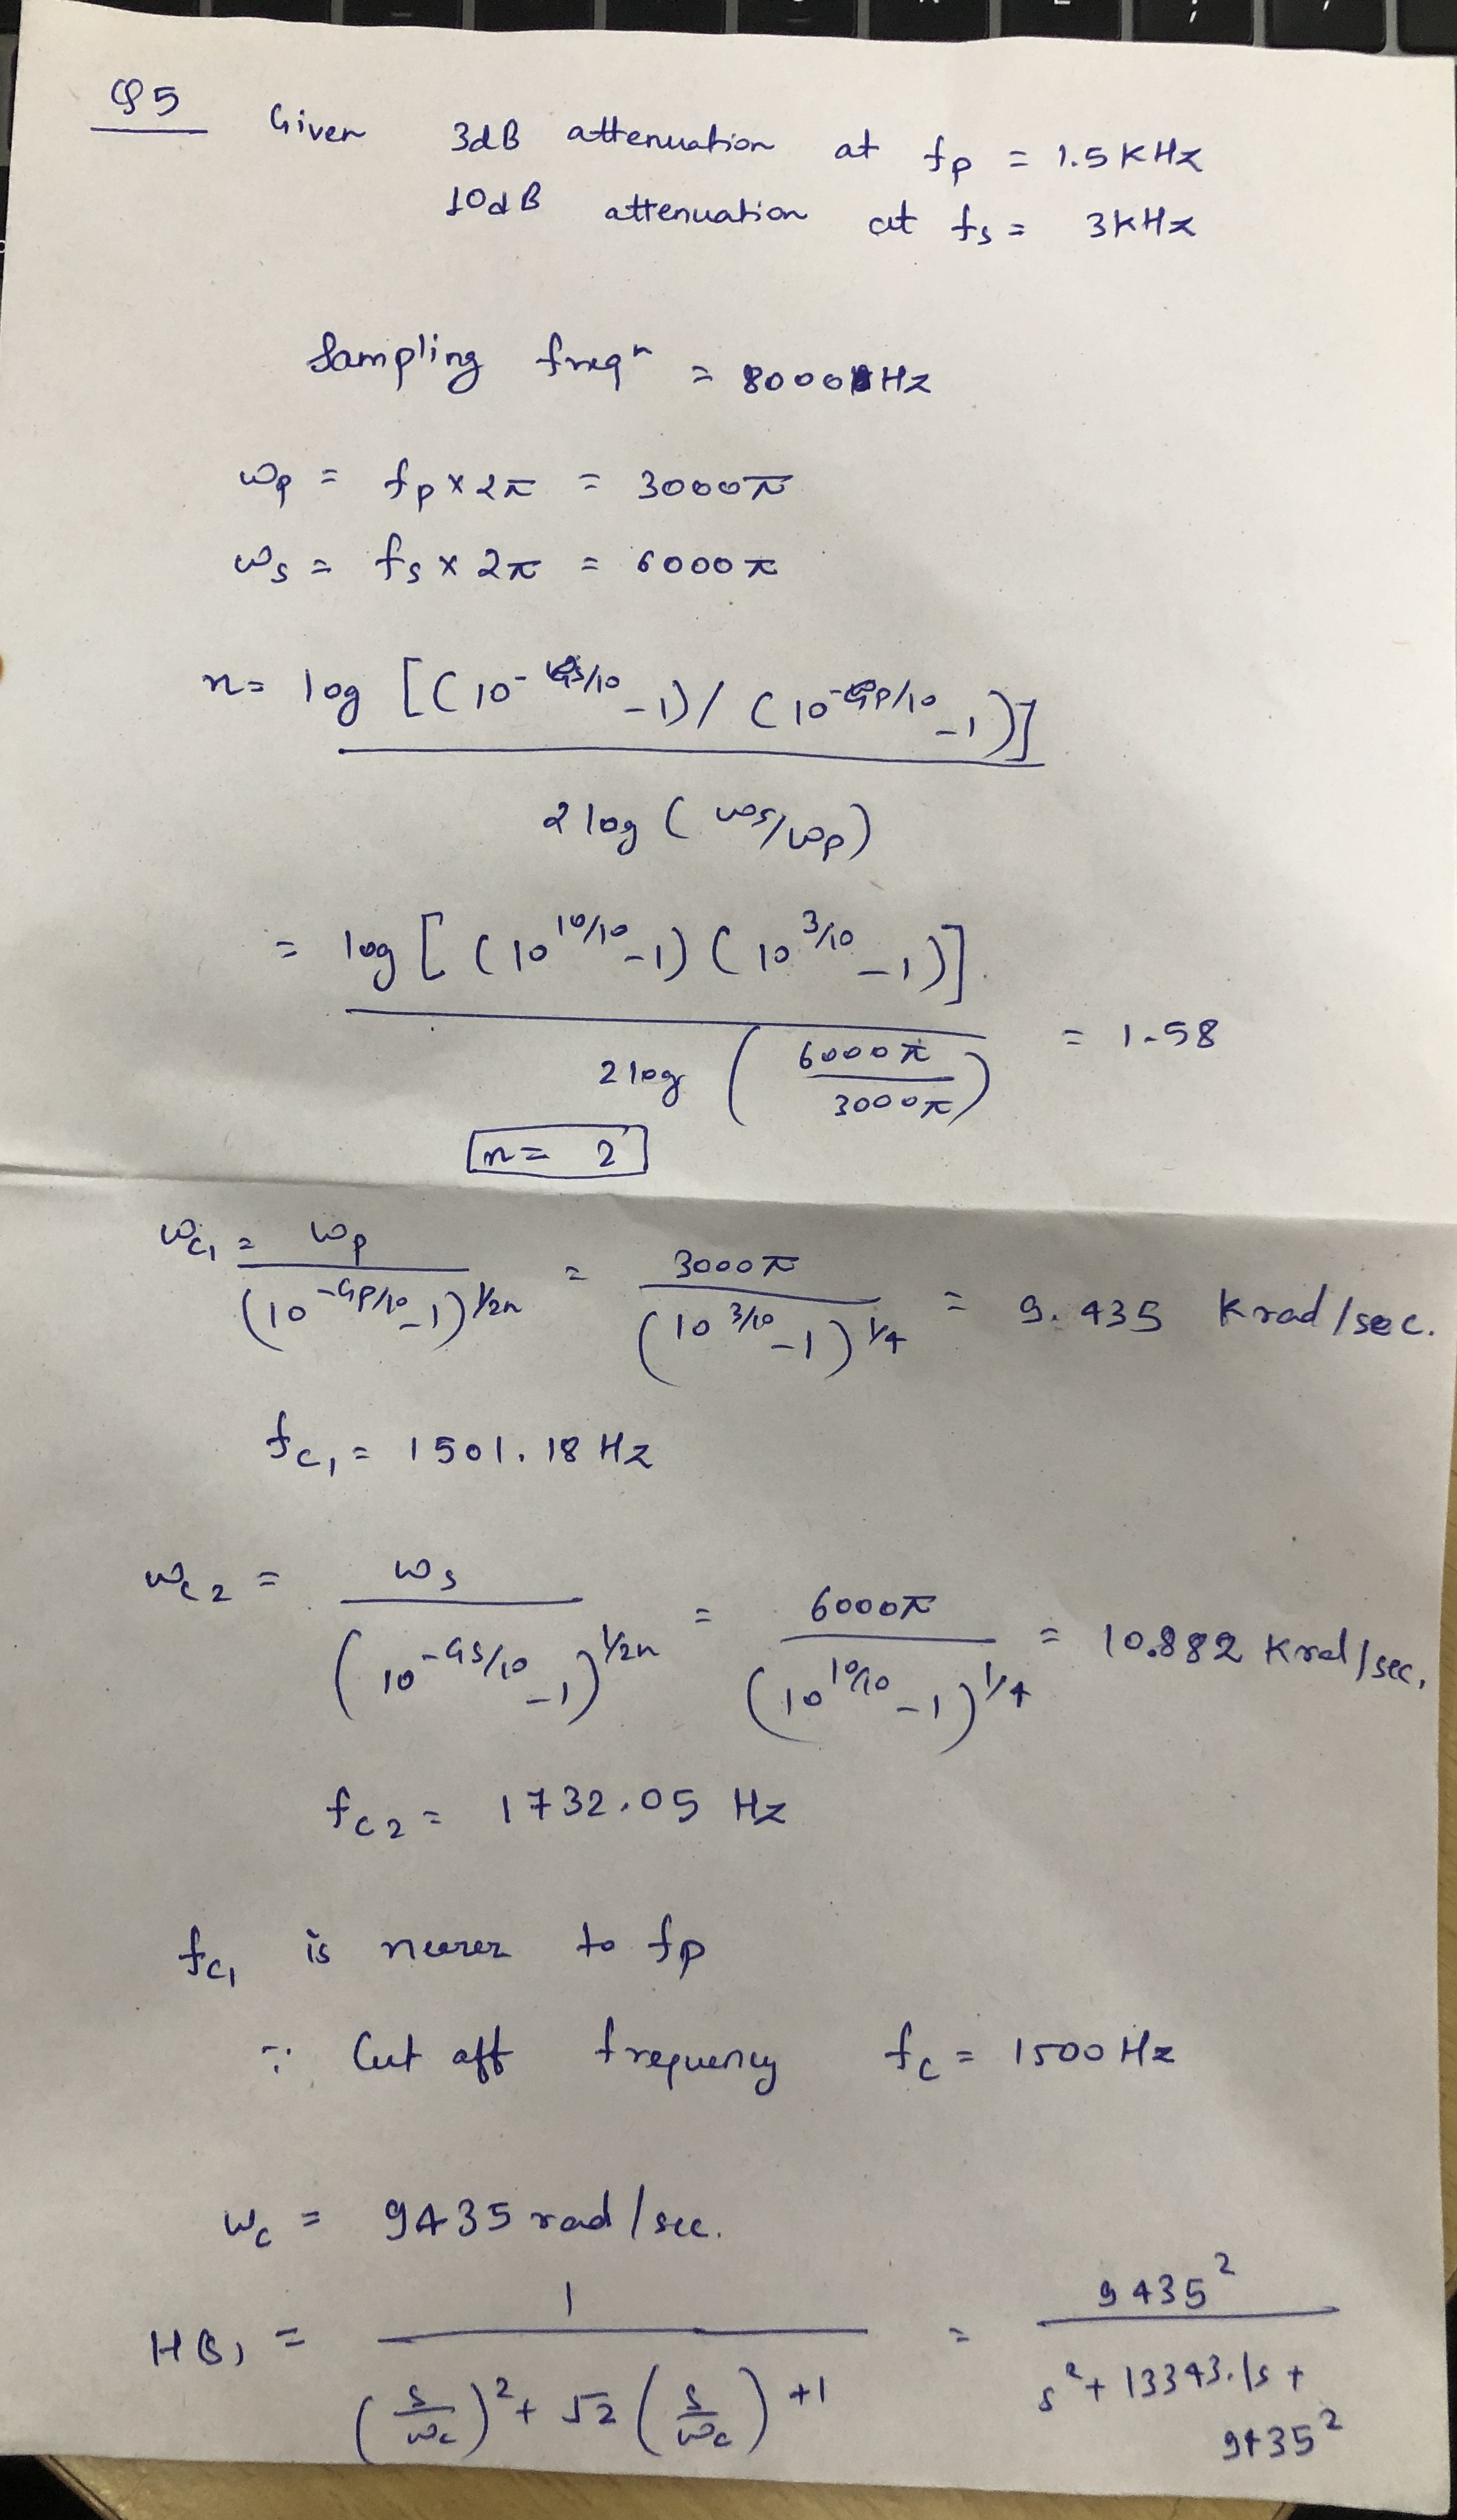

<Figure size 864x432 with 0 Axes>

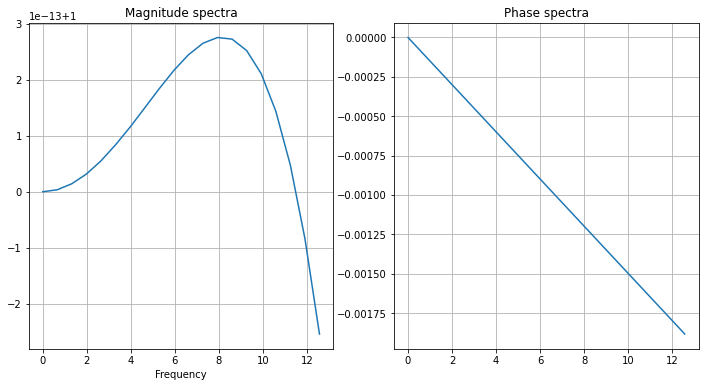

In [139]:
w=np.linspace(0,4*np.pi,20)
a=1j*w
h_s=(9435**2)/((a**2)+(13343.1*a)+(9435**2))
plt.figure(figsize=(12,6))



fig, ax=plt.subplots(1,2,figsize=(12,6)) 
ax[0].plot(w,np.abs(h_s))
ax[0].set_title('Magnitude spectra')
ax[0].set_xlabel("Frequency")
ax[0].grid()
ax[1].plot(w,np.angle(h_s))
ax[1].set_title('Phase spectra')

ax[1].grid()

# 6.(a)

In [122]:
import time
begin=time.time()
N=1024
x=np.linspace(-200,200,N)
n = np.arange(N)
k = n.reshape((N, 1))
def DFT(x):
    N = len(x)
    output = []
    for k in range(N):
        dft = 0
        for n in range(N):
            dft+=(x[n]*np.exp(-2j*np.pi*k*n/N))
        output.append(dft)
    return output
        
    

end=time.time()
run_time1=end-begin
print("Operations required for coputing DFT:")
print("Complex multiplication=",N**2)
print("Complex Addition      =",N*(N-1))
print("Run time of code     =",run_time1,"sec")


Operations required for coputing DFT:
Complex multiplication= 1048576
Complex Addition      = 1047552
Run time of code     = 0.0010280609130859375 sec


# 6.(b)

In [123]:
begin=time.time()
dft=np.fft.fft(x)

end=time.time()
run_time2=end-begin
print("Run time of code=",run_time2,"sec")

Run time of code= 0.00036907196044921875 sec


# 6.(c)

In [124]:
print("comparing the closeness:",run_time1-run_time2,"sec")


comparing the closeness: 0.0006589889526367188 sec


### By comapring run time of DFT function and inbult FFt function i am observing that inbuilt FFt function is taking very less time whereas DFT function is taking more time and there time difference is very close

# 6.(d)

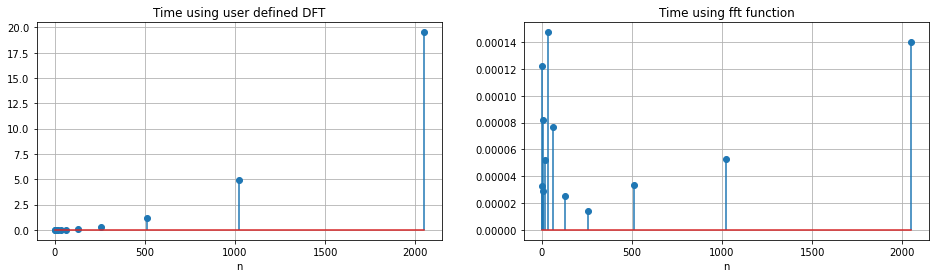

In [134]:
N_values = [2**i for i in range(0,12)]
time_a = []
time_b = []

for N in N_values:
    x = np.random.randn(N)
    
    start_a = time.time()
    dft_a = DFT(x)
    end_a = time.time()
    run_time_a = end_a - start_a
    time_a.append(run_time_a)
    
    start_b = time.time()
    dft_b = np.fft.fft(x)
    end_b = time.time()
    run_time_b = end_b - start_b
    time_b.append(run_time_b)
    
fig, ax=plt.subplots(1,2,figsize=(16,4))

ax[0].stem(N_values,time_a)
ax[0].set_title('Time using user defined DFT')
ax[0].set_xlabel("n")
ax[0].grid()

ax[1].stem(N_values,time_b)
ax[1].set_title('Time using fft function')
ax[1].set_xlabel("n")
ax[1].grid()

# 7

Time to calculate  0.0012378692626953125  seconds


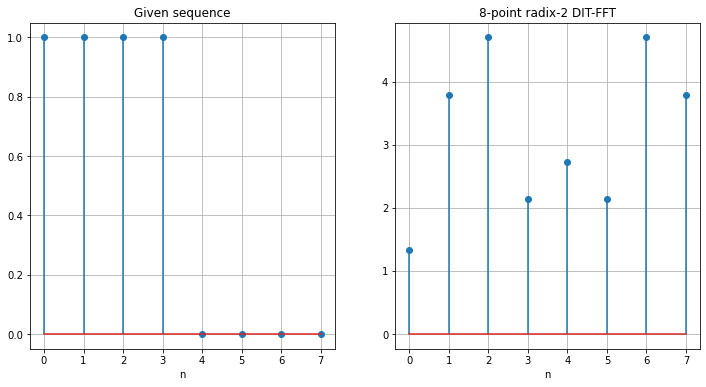

In [132]:
begin = time.time()

x_n = [1,1,1,1,0,0,0,0]
w = np.exp(-1j*2*np.pi/8)

x_1 = np.zeros(8,dtype=complex)

x_1[0] = x[0] + x[4]
x_1[1] = x[0] - x[4]

x_1[2] = x[2] + x[6]
x_1[3] = x[2] - x[6]

x_1[4] = x[1] + x[5]
x_1[5] = x[1] - x[5]

x_1[6] = x[3] + x[7]
x_1[7] = x[3] - x[7]



x_2 = np.zeros(8,dtype=complex)

x_2[0] = x_1[0] + (w**0)*x_1[2]
x_2[1] = x_1[1] + (w**2)*x_1[3]
x_2[2] = x_1[0] - (w**0)*x_1[2]
x_2[3] = x_1[1] - (w**2)*x_1[3]

x_2[4] = x_1[4] + (w**0)*x_1[6]
x_2[5] = x_1[5] + (w**2)*x_1[7]
x_2[6] = x_1[4] - (w**0)*x_1[6]
x_2[7] = x_1[5] - (w**2)*x_1[7]

x_3 = np.zeros(8,dtype=complex)

x_3[0] = x_2[0] + (w**0)*x_2[4]
x_3[1] = x_2[1] + (w**1)*x_2[5]
x_3[2] = x_2[2] + (w**2)*x_2[6]
x_3[3] = x_2[3] + (w**3)*x_2[7]
x_3[4] = x_2[0] - (w**0)*x_2[4]
x_3[5] = x_2[1] - (w**1)*x_2[5]        # x_3 is the final output of DIT FFT
x_3[6] = x_2[2] - (w**2)*x_2[6]
x_3[7] = x_2[3] - (w**3)*x_2[7]


end = time.time()
print("Time to calculate ",end-begin," seconds")

n = np.arange(8)
fig, ax=plt.subplots(1,2,figsize=(12,6))

ax[0].stem(n,x_n)
ax[0].set_title('Given sequence')
ax[0].set_xlabel("n")
ax[0].grid()

ax[1].stem(n,np.absolute(x_3))
ax[1].set_title('8-point radix-2 DIT-FFT')
ax[1].set_xlabel("n")
ax[1].grid()

# 8

# 9.(a)

In [100]:
x_n = [1,2,3,1]
h_n=[1,1,1,0]
Length=len(x_n)+len(h_n)-1

# function defining of Linear convulation

def linear_convolve(p,q):                                                      
    q_new=np.pad(q,(0,Length-len(q)))
    sum=np.zeros(Length)
    for i in range(len(p)):
        sum=sum+p[i]*q_new
        q_new=np.roll(q_new,1)
    return sum  
print("Linear convolution of x(n) and h(n):",linear_convolve(x_n,h_n))

Linear convolution of x(n) and h(n): [1. 3. 6. 6. 4. 1. 0.]


# 9.(b)

In [101]:
def rotate(l, n):
     return l[n:] + l[:n]
N=len(x_n)
W=np.zeros((N,N))
for i in range(N):
    W[:,i]=rotate(x_n,N-i) 
Circular_Convolve= np.dot(W,h_n)
print("Circular convolution of x(n) and h(n):",Circular_Convolve)

Circular convolution of x(n) and h(n): [5. 4. 6. 6.]
